<a href="https://colab.research.google.com/github/Mitchell-Odili/Commercial-Air-Travel-Analysis/blob/main/Air_Travel_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('commercial-air-travel-analysis')
jovian.set_colab_id('14gOyETjatKcAT29BD-FdoAQFeGJ8yrG-')

# Commercial Air Travel Analysis

![](https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/202001/MIT-Air-Safety-01_1.jpg?itok=bebs5Tqr)
In this Jupyter notebook, we'll analyze the Commercial Air Travel dataset on flights from San Francisco International airport to various destinations from 2005 to 2008. This dataset was obtained from UC Berkeley, Department of Statistics and D-Lab; Data presented by Chris Paciorek. The dataset contains relevant characteristics/ features of US airlines from 2005 to 2008. You can find the raw data & official analysis here: https://github.com/berkeley-scf/r-bootcamp-2016/tree/master/data.

There are several options for getting the dataset into Jupyter:

- Download the CSV manually and upload it via Jupyter's GUI
- Use the urlretrieve function from the urllib.request to download CSV files from a raw URL
- Use a helper library, e.g., opendatasets, which contains a collection of curated datasets and provides a helper function for direct download.

We'll use the opendatasets helper library to download the files.

## Package Install and Import
First we will install and import the necessary packages

In [ ]:
!pip install opendatasets --upgrade --q

In [ ]:
import opendatasets as od

In [ ]:
dataset_url = ['https://www.kaggle.com/mitchellodili/airlinecsv']

In [ ]:
od.download('https://www.kaggle.com/mitchellodili/airlinecsv')

Skipping, found downloaded files in ".\airlinecsv" (use force=True to force download)


In [ ]:
dataset_url = ['https://www.kaggle.com/mitchellodili/carrierscsv']

In [ ]:
od.download('https://www.kaggle.com/mitchellodili/carrierscsv')

Skipping, found downloaded files in ".\carrierscsv" (use force=True to force download)


## Verify 
Let's verify that the dataset was uploaded into the directory and retrieve the list of files in the dataset.

In [ ]:
import os
os.listdir()

['.ipynb_checkpoints',
 '.jovianrc',
 'airlinecsv',
 'Air_Travel_Analysis.ipynb',
 'carrierscsv']

In [ ]:
!pip install jovian --upgrade --q

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="commercial-air-travel-analysis")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: 

## Load the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the Dataset 
Now we are ready to load the dataset. We will do this using the standard read_csv command from Pandas. Let's take a glimpse at how the data looks like.

In [ ]:
air_df = pd.read_csv('airlinecsv/airline.csv')
air_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,1,6,1211.0,1216,1451.0,1502,UA,548,...,2.0,17.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2005,1,2,7,1209.0,1216,1447.0,1502,UA,548,...,2.0,17.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2005,1,3,1,1213.0,1216,1454.0,1502,UA,548,...,3.0,15.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2005,1,4,2,NaN,1216,NaN,1502,UA,548,...,0.0,0.0,1,A,0,0.0,0.0,0.0,0.0,0.0
4,2005,1,5,3,1211.0,1216,1504.0,1502,UA,548,...,6.0,22.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539890,2008,12,13,6,848.0,850,1552.0,1625,DL,1066,...,7.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
539891,2008,12,13,6,1315.0,1318,2040.0,2049,DL,1070,...,12.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
539892,2008,12,13,6,2303.0,2300,611.0,627,DL,1074,...,9.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
539893,2008,12,13,6,751.0,800,1459.0,1523,DL,1096,...,5.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


After a quick glimpse of the dataset, we have 500,000+ observations of passenger travel information with 29 different features ranging from the year, month day, time, all through to delays and cancellations. We can also see there are Nan values in some columns


In [ ]:
# Let's view the list of columns in the dataframe

air_df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

It appears short codes have been used for column names and values. 

We can use the carrier file to see the full name of each carrier. The carrier file contains only two columns `Code` and `Description`. We can load it as a Panda series with `Code` as the index and `Description` as the value

In [ ]:
carrier_name = pd.read_csv('carrierscsv/carriers.csv', index_col = 'Code').Description
carrier_name

Code
02Q                       Titan Airways
04Q                  Tradewind Aviation
05Q                 Comlux Aviation, AG
06Q       Master Top Linhas Aereas Ltd.
07Q                 Flair Airlines Ltd.
                      ...              
ZW          Air Wisconsin Airlines Corp
ZX                         Air Georgian
ZX (1)                       Airbc Ltd.
ZY               Atlantic Gulf Airlines
ZYZ                Skyway Aviation Inc.
Name: Description, Length: 1491, dtype: object

We can now use `carrier_name` to retrieve the full carrier name for a carrier in `air_df['Unique_carrier']`

In [ ]:
# Check the count of carriers in air_df['Unique_carrier']

air_df['UniqueCarrier'].value_counts()

UA    178546
OO    159658
AA     50255
US     25100
DL     21612
AS     20608
CO     19029
NW     15358
WN     15243
F9      8418
MQ      7141
HP      4485
FL      3368
B6      3214
XE      2367
TZ      2321
HA      1460
EV       742
DH       470
YV       470
OH        30
Name: UniqueCarrier, dtype: int64

In [ ]:
# Retrieve the full carrier name for UA

carrier_name['UA']

'United Air Lines Inc.'

We've now loaded the dataset. We're ready to move on to the next step of preprocessing & cleaning the data for our analysis.

## Save and upload your notebook

Whether you're running this Jupyter notebook online or on your computer, it's essential to save your work from time to time. You can continue working on a saved notebook later or share it with friends and colleagues to let them execute your code. Jovian offers an easy way of saving and sharing your Jupyter notebooks online.

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="commercial-air-travel-analysis")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mitchell-odili/commercial-air-travel-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mitchell-odili/commercial-air-travel-analysis


'https://jovian.ai/mitchell-odili/commercial-air-travel-analysis'

## Data Preparation & Cleaning

In [ ]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539895 entries, 0 to 539894
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               539895 non-null  int64  
 1   Month              539895 non-null  int64  
 2   DayofMonth         539895 non-null  int64  
 3   DayOfWeek          539895 non-null  int64  
 4   DepTime            530574 non-null  float64
 5   CRSDepTime         539895 non-null  int64  
 6   ArrTime            529423 non-null  float64
 7   CRSArrTime         539895 non-null  int64  
 8   UniqueCarrier      539895 non-null  object 
 9   FlightNum          539895 non-null  int64  
 10  TailNum            538289 non-null  object 
 11  ActualElapsedTime  529364 non-null  float64
 12  CRSElapsedTime     539891 non-null  float64
 13  AirTime            529364 non-null  float64
 14  ArrDelay           529364 non-null  float64
 15  DepDelay           530574 non-null  float64
 16  Or

There are 539,985 entries and 29 columns to work with for exploratory data analysis. Right off the bat, there are a few columns that contain null values (DepTime,ArrTime etc)

Most columns have the data type integer/float with a few with data type object which is either because they contain values of different types(categorical values) or contain empty values (NaN). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.

In [ ]:
air_df['FlightNum'] = air_df['FlightNum'].astype('str')
air_df['Cancelled'] = air_df['Cancelled'].astype('str')
air_df['Diverted'] = air_df['Diverted'].astype('str')

Convert Flight Number, Cancelled and Diverted Flights to object type

In [ ]:
air_df['TailNum'].value_counts()

0         3778
N234SW    2379
N292SW    2362
N294SW    2271
N295SW    2231
          ... 
N187DN       1
N496CA       1
N442CA       1
N197DN       1
N836AS       1
Name: TailNum, Length: 3982, dtype: int64

TailNum is categorical and therefore rightfully of dtype object. Let's examine the time variables. We need to have them in the `HH:MM` format

In [ ]:
air_df['DepTime'], air_df['CRSArrTime'], air_df['CRSDepTime'], air_df['ArrTime']

(0         1211.0
 1         1209.0
 2         1213.0
 3            NaN
 4         1211.0
            ...  
 539890     848.0
 539891    1315.0
 539892    2303.0
 539893     751.0
 539894    1134.0
 Name: DepTime, Length: 539895, dtype: float64,
 0         1502
 1         1502
 2         1502
 3         1502
 4         1502
           ... 
 539890    1625
 539891    2049
 539892     627
 539893    1523
 539894    1855
 Name: CRSArrTime, Length: 539895, dtype: int64,
 0         1216
 1         1216
 2         1216
 3         1216
 4         1216
           ... 
 539890     850
 539891    1318
 539892    2300
 539893     800
 539894    1134
 Name: CRSDepTime, Length: 539895, dtype: int64,
 0         1451.0
 1         1447.0
 2         1454.0
 3            NaN
 4         1504.0
            ...  
 539890    1552.0
 539891    2040.0
 539892     611.0
 539893    1459.0
 539894    1833.0
 Name: ArrTime, Length: 539895, dtype: float64)

In [ ]:
air_df['DepTime'] = pd.to_datetime(air_df['DepTime'], format = '%H%M', errors = 'coerce')
air_df['CRSDepTime'] = pd.to_datetime(air_df['CRSDepTime'], format = '%H%M', errors = 'coerce')
air_df['ArrTime'] = pd.to_datetime(air_df['ArrTime'], format = '%H%M', errors = 'coerce')
air_df['CRSArrTime'] = pd.to_datetime(air_df['CRSArrTime'], format = '%H%M', errors = 'coerce')

In [ ]:
air_df['DepTime'] = air_df['DepTime'].dt.time
air_df['CRSDepTime'] = air_df['CRSDepTime'].dt.time
air_df['ArrTime'] = air_df['ArrTime'].dt.time
air_df['CRSArrTime'] = air_df['CRSArrTime'].dt.time

In [ ]:
air_df['DepTime'], air_df['CRSArrTime'], air_df['CRSDepTime'], air_df['ArrTime']

(0         12:11:00
 1         12:09:00
 2         12:13:00
 3              NaT
 4         12:11:00
             ...   
 539890    08:48:00
 539891    13:15:00
 539892    23:03:00
 539893    07:51:00
 539894    11:34:00
 Name: DepTime, Length: 539895, dtype: object,
 0         15:02:00
 1         15:02:00
 2         15:02:00
 3         15:02:00
 4         15:02:00
             ...   
 539890    16:25:00
 539891    20:49:00
 539892    06:27:00
 539893    15:23:00
 539894    18:55:00
 Name: CRSArrTime, Length: 539895, dtype: object,
 0         12:16:00
 1         12:16:00
 2         12:16:00
 3         12:16:00
 4         12:16:00
             ...   
 539890    08:50:00
 539891    13:18:00
 539892    23:00:00
 539893    08:00:00
 539894    11:34:00
 Name: CRSDepTime, Length: 539895, dtype: object,
 0         14:51:00
 1         14:47:00
 2         14:54:00
 3              NaT
 4         15:04:00
             ...   
 539890    15:52:00
 539891    20:40:00
 539892    06:11:00
 539893    14

In [ ]:
air_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,1,6,12:11:00,12:16:00,14:51:00,15:02:00,UA,548,...,2.0,17.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2005,1,2,7,12:09:00,12:16:00,14:47:00,15:02:00,UA,548,...,2.0,17.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2005,1,3,1,12:13:00,12:16:00,14:54:00,15:02:00,UA,548,...,3.0,15.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2005,1,4,2,NaT,12:16:00,NaT,15:02:00,UA,548,...,0.0,0.0,1,A,0,0.0,0.0,0.0,0.0,0.0
4,2005,1,5,3,12:11:00,12:16:00,15:04:00,15:02:00,UA,548,...,6.0,22.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539890,2008,12,13,6,08:48:00,08:50:00,15:52:00,16:25:00,DL,1066,...,7.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
539891,2008,12,13,6,13:15:00,13:18:00,20:40:00,20:49:00,DL,1070,...,12.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
539892,2008,12,13,6,23:03:00,23:00:00,06:11:00,06:27:00,DL,1074,...,9.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
539893,2008,12,13,6,07:51:00,08:00:00,14:59:00,15:23:00,DL,1096,...,5.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Let's now view some basic statistics about numeric columns.

In [ ]:
air_df.describe()

,Year,Month,DayofMonth,DayOfWeek,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,539895.000000,539895.000000,539895.000000,539895.000000,529364.000000,539891.000000,529364.000000,529364.000000,530574.000000,539895.000000,536822.000000,537123.000000,433902.000000,433902.000000,433902.000000,433902.000000,433902.000000
mean,2006.538423,6.574089,15.739844,3.955869,158.032632,159.133634,134.543001,9.616848,11.161380,1052.923096,6.387948,16.598081,6.045404,0.296396,2.943395,0.018428,6.909662
std,1.116732,3.406552,8.789787,1.995492,100.115819,100.320627,97.309810,36.119927,34.378816,892.983650,4.966264,7.263382,23.562993,5.888101,12.646370,1.082422,24.033356
min,2005.000000,1.000000,1.000000,1.000000,-23.000000,20.000000,-38.000000,-82.000000,-169.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,4.000000,8.000000,2.000000,80.000000,83.000000,58.000000,-9.000000,-5.000000,337.000000,4.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,7.000000,16.000000,4.000000,108.000000,108.000000,86.000000,0.000000,-1.000000,599.000000,5.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,9.000000,23.000000,6.000000,250.000000,251.000000,222.000000,14.000000,10.000000,1846.000000,8.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2008.000000,12.000000,31.000000,7.000000,1090.000000,520.000000,1068.000000,1639.000000,1659.000000,2704.000000,199.000000,262.000000,1639.000000,621.000000,501.000000,308.000000,613.000000


In [ ]:
air_df.nunique()

Year                    4
Month                  12
DayofMonth             31
DayOfWeek               7
DepTime              1206
CRSDepTime           1060
ArrTime              1293
CRSArrTime           1206
UniqueCarrier          21
FlightNum            2327
TailNum              3982
ActualElapsedTime     558
CRSElapsedTime        317
AirTime               491
ArrDelay              569
DepDelay              552
Origin                  1
Dest                   82
Distance               82
TaxiIn                131
TaxiOut               159
Cancelled               2
CancellationCode        4
Diverted                2
CarrierDelay          451
WeatherDelay          248
NASDelay              295
SecurityDelay          74
LateAircraftDelay     382
dtype: int64

## Handling Null Values
We can see that for each of the columns, there are alot different unique values for some of them. It makes sense that departure and arrival times are large since this is data recorded over 4 years. Flight Numbers and Tail Numbers contain many unique values as well.

Are there any Null (Non - existent) values?

In [ ]:
air_df.isnull().values.any()

True

How many values are non existent in the airline data set?

In [ ]:
air_df.isnull().sum().sum()

1135819

We can see that there are 1 million + null values in the entire dataset. Let's plot a heat map of all the Null values in the data set

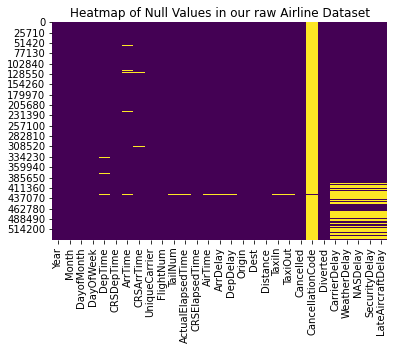

In [ ]:
sns.heatmap(air_df.isnull(), cbar = False, cmap = 'viridis')
plt.title("Heatmap of Null Values in our raw Airline Dataset");

In [ ]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539895 entries, 0 to 539894
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               539895 non-null  int64  
 1   Month              539895 non-null  int64  
 2   DayofMonth         539895 non-null  int64  
 3   DayOfWeek          539895 non-null  int64  
 4   DepTime            529847 non-null  object 
 5   CRSDepTime         539889 non-null  object 
 6   ArrTime            525560 non-null  object 
 7   CRSArrTime         537349 non-null  object 
 8   UniqueCarrier      539895 non-null  object 
 9   FlightNum          539895 non-null  object 
 10  TailNum            538289 non-null  object 
 11  ActualElapsedTime  529364 non-null  float64
 12  CRSElapsedTime     539891 non-null  float64
 13  AirTime            529364 non-null  float64
 14  ArrDelay           529364 non-null  float64
 15  DepDelay           530574 non-null  float64
 16  Or

Let's select a subset of columns with relevant data for our analysis

In [ ]:
selected_columns = [
    'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 
    'TailNum','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay', 'DepDelay','Origin', 'Dest', 'Distance',
    'TaxiIn', 'TaxiOut', 'Cancelled','Diverted'
]

In [ ]:
len(selected_columns)

23

In [ ]:
air_sub_df = air_df[selected_columns].copy()

In [ ]:
air_sub_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,2005,1,1,6,12:11:00,12:16:00,14:51:00,15:02:00,UA,548,...,81.0,-11.0,-5.0,SFO,SLC,599,2.0,17.0,0,0
1,2005,1,2,7,12:09:00,12:16:00,14:47:00,15:02:00,UA,548,...,79.0,-15.0,-7.0,SFO,SLC,599,2.0,17.0,0,0
2,2005,1,3,1,12:13:00,12:16:00,14:54:00,15:02:00,UA,548,...,83.0,-8.0,-3.0,SFO,SLC,599,3.0,15.0,0,0
3,2005,1,4,2,NaT,12:16:00,NaT,15:02:00,UA,548,...,NaN,NaN,NaN,SFO,SLC,599,0.0,0.0,1,0
4,2005,1,5,3,12:11:00,12:16:00,15:04:00,15:02:00,UA,548,...,85.0,2.0,-5.0,SFO,SLC,599,6.0,22.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539890,2008,12,13,6,08:48:00,08:50:00,15:52:00,16:25:00,DL,1066,...,223.0,-33.0,-2.0,SFO,ATL,2139,7.0,14.0,0,0
539891,2008,12,13,6,13:15:00,13:18:00,20:40:00,20:49:00,DL,1070,...,235.0,-9.0,-3.0,SFO,ATL,2139,12.0,18.0,0,0
539892,2008,12,13,6,23:03:00,23:00:00,06:11:00,06:27:00,DL,1074,...,229.0,-16.0,3.0,SFO,ATL,2139,9.0,10.0,0,0
539893,2008,12,13,6,07:51:00,08:00:00,14:59:00,15:23:00,DL,1096,...,227.0,-24.0,-9.0,SFO,CVG,2036,5.0,16.0,0,0


Let's plot a heat map of all the Null values in our subset

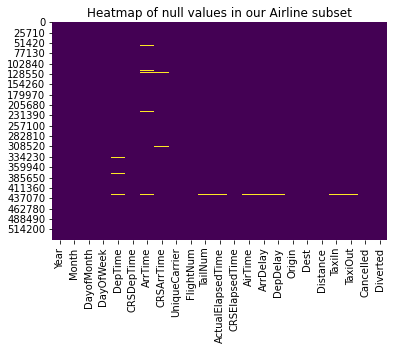

In [ ]:
sns.heatmap(air_sub_df.isnull(), cbar = False, cmap = 'viridis')
plt.title("Heatmap of null values in our Airline subset");

Locate them in our sub set - new data set

In [ ]:
air_sub_df.loc[:, air_sub_df.isnull().any()].head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,TaxiIn,TaxiOut
0,12:11:00,12:16:00,14:51:00,15:02:00,N341UA,100.0,106.0,81.0,-11.0,-5.0,2.0,17.0
1,12:09:00,12:16:00,14:47:00,15:02:00,N398UA,98.0,106.0,79.0,-15.0,-7.0,2.0,17.0
2,12:13:00,12:16:00,14:54:00,15:02:00,N303UA,101.0,106.0,83.0,-8.0,-3.0,3.0,15.0
3,NaT,12:16:00,NaT,15:02:00,000000,NaN,106.0,NaN,NaN,NaN,0.0,0.0
4,12:11:00,12:16:00,15:04:00,15:02:00,N917UA,113.0,106.0,85.0,2.0,-5.0,6.0,22.0


Let's look at the shape of the dataset and compare with the number of missing values

In [ ]:
air_sub_df.shape

(539895, 23)

In [ ]:
air_sub_df.isnull().sum().sum()

75304

The dataset has 75,304 missing values. Let's examine their distribution

In [ ]:
air_sub_df.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime              10048
CRSDepTime               6
ArrTime              14335
CRSArrTime            2546
UniqueCarrier            0
FlightNum                0
TailNum               1606
ActualElapsedTime    10531
CRSElapsedTime           4
AirTime              10531
ArrDelay             10531
DepDelay              9321
Origin                   0
Dest                     0
Distance                 0
TaxiIn                3073
TaxiOut               2772
Cancelled                0
Diverted                 0
dtype: int64

Majority of the missing values are related to time records. Each variable/feature has 539,985 entries. I will therefore drop the missing values as they range from 2700 to 14000 (0.6% to less than 3%) of our observations 

In [ ]:
air_sub_df = air_sub_df.dropna()

In [ ]:
air_sub_df.isnull().sum().sum()

0

Let's plot a heatmap of the processed data 

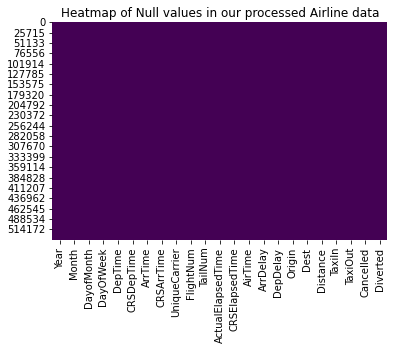

In [ ]:
sns.heatmap(air_sub_df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Heatmap of Null values in our processed Airline data');

In [ ]:
# Alternatively Locate missing values in processed data

air_sub_df.loc[:, air_sub_df.isnull().any()].head()

""
0
1
2
4
5


## Save and upload your notebook
Whether you're running this Jupyter notebook online or on your computer, it's essential to save your work from time to time. You can continue working on a saved notebook later or share it with friends and colleagues to let them execute your code. Jovian offers an easy way of saving and sharing your Jupyter notebooks online.

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="commercial-air-travel-analysis")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mitchell-odili/commercial-air-travel-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mitchell-odili/commercial-air-travel-analysis


'https://jovian.ai/mitchell-odili/commercial-air-travel-analysis'

## Exploratory Data Analysis and Visualization


First we will begin analysis on the processed airline dataset to understand key essential components that make up the dataset. Revisiting the data, let us see how it looked like again.

In [ ]:
air_sub_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,2005,1,1,6,12:11:00,12:16:00,14:51:00,15:02:00,UA,548,...,81.0,-11.0,-5.0,SFO,SLC,599,2.0,17.0,0,0
1,2005,1,2,7,12:09:00,12:16:00,14:47:00,15:02:00,UA,548,...,79.0,-15.0,-7.0,SFO,SLC,599,2.0,17.0,0,0
2,2005,1,3,1,12:13:00,12:16:00,14:54:00,15:02:00,UA,548,...,83.0,-8.0,-3.0,SFO,SLC,599,3.0,15.0,0,0
4,2005,1,5,3,12:11:00,12:16:00,15:04:00,15:02:00,UA,548,...,85.0,2.0,-5.0,SFO,SLC,599,6.0,22.0,0,0
5,2005,1,6,4,12:14:00,12:15:00,15:06:00,15:05:00,UA,548,...,95.0,1.0,-1.0,SFO,SLC,599,6.0,11.0,0,0


Let's now view some basic statistics about numeric columns.

In [ ]:
air_sub_df.describe()

,Year,Month,DayofMonth,DayOfWeek,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
count,522870.000000,522870.000000,522870.000000,522870.000000,522870.000000,522870.000000,522870.000000,522870.000000,522870.000000,522870.000000,522870.000000,522870.000000
mean,2006.534253,6.576049,15.737220,3.957619,157.692520,159.206399,134.201125,9.490378,11.004257,1053.184256,6.483032,16.792767
std,1.117022,3.397226,8.788092,1.995833,100.075404,100.312566,97.242578,35.960267,34.158404,892.576033,4.950261,7.060288
min,2005.000000,1.000000,1.000000,1.000000,11.000000,30.000000,0.000000,-82.000000,-169.000000,11.000000,0.000000,0.000000
25%,2006.000000,4.000000,8.000000,2.000000,80.000000,83.000000,58.000000,-9.000000,-5.000000,337.000000,4.000000,12.000000
50%,2007.000000,7.000000,16.000000,4.000000,107.000000,108.000000,85.000000,-1.000000,-1.000000,599.000000,5.000000,15.000000
75%,2008.000000,9.000000,23.000000,6.000000,250.000000,251.000000,222.000000,14.000000,10.000000,1846.000000,8.000000,19.000000
max,2008.000000,12.000000,31.000000,7.000000,1090.000000,520.000000,1068.000000,1639.000000,1659.000000,2704.000000,199.000000,262.000000


## Air Flight Duration

Let's look at the spread of flight time from San Francisco International airport between 2005 to 2008

### Explore the origins

In [ ]:
air_sub_df.Origin.nunique()

1

In [ ]:
air_sub_df.Origin.value_counts()

SFO    522870
Name: Origin, dtype: int64

### Explore the destinations

In [ ]:
air_sub_df.Dest.nunique()

73

In [ ]:
air_sub_df.Dest.value_counts()

LAX    42779
LAS    23673
JFK    23070
ORD    21677
SEA    21500
       ...  
EGE       16
BIL       13
MSO       12
FCA       12
OAK        1
Name: Dest, Length: 73, dtype: int64

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


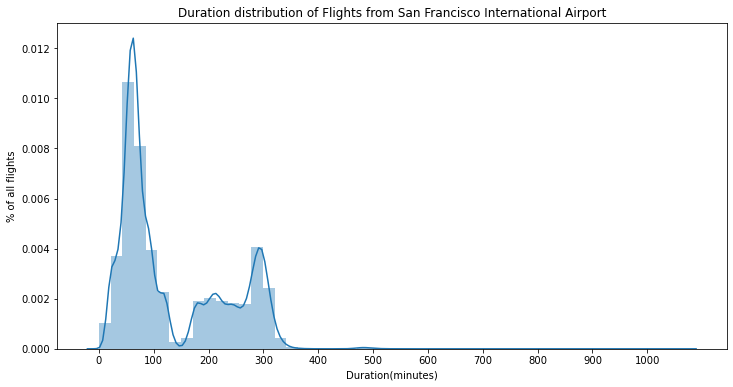

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
g1 = sns.distplot(air_sub_df.AirTime)
g1.set_title('Duration distribution of Flights from San Francisco International Airport')
g1.set_ylabel('% of all flights')
g1.set_xticks(np.arange(0,1100,100))
g1.set_xlabel('Duration(minutes)');

We have a bimodal dataset with most flights taking about 60 minutes and another set of flights taking about 300 minutes

### Cancelled Flights

It would be interesting to see the number of cancelled flights within that time period

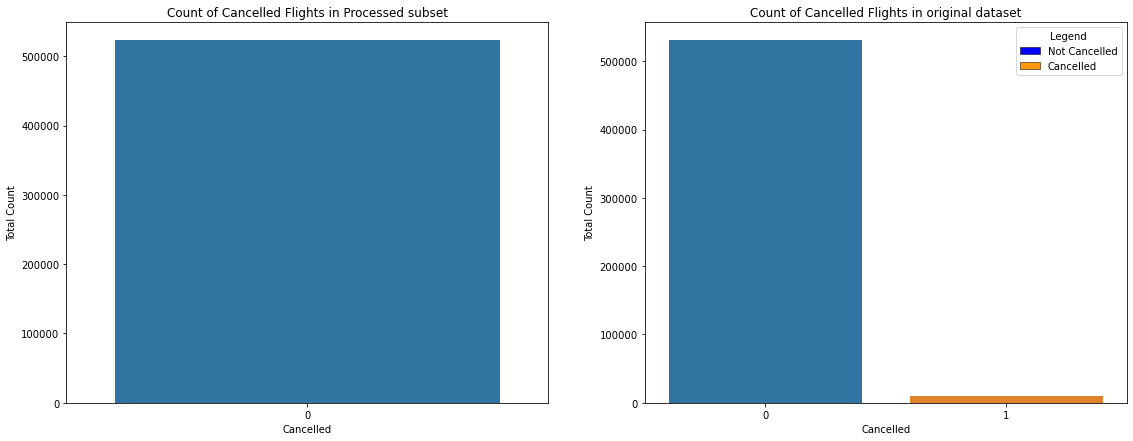

In [ ]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1,2, figsize = (19,7))
g1 = sns.countplot(x = air_sub_df.Cancelled, ax = ax[0])
g1.set_title('Count of Cancelled Flights in Processed subset')
g1.set_ylabel('Total Count')

one = mpatches.Patch(facecolor='Blue', label='Not Cancelled', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#ff9700', label = 'Cancelled', linewidth = 0.5, edgecolor = 'black')

g2 = sns.countplot(x = air_df.Cancelled, ax = ax[1])
g2.set_title('Count of Cancelled Flights in original dataset')
g2.set_ylabel('Total Count')
g2.legend(handles = [one,two], title = 'Legend');

In [ ]:
air_df.Cancelled.value_counts()

0    530550
1      9345
Name: Cancelled, dtype: int64

There are no cancelled flights in our processed dataset however there were about 9,345 cancelled flights in the original dataset, contributing to some of the null values as I assume, there were no time entries to record

### Diverted Flights

It would be interesting to see the share of diverted flights within that time period

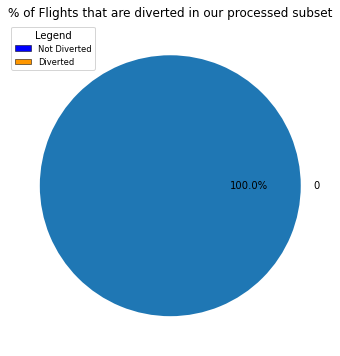

In [ ]:
plt.figure(figsize = (16,6))
plt.pie(air_sub_df.Diverted.value_counts(), 
        labels = air_sub_df.Diverted.value_counts().index, autopct = '%1.1f%%', startangle= 180)
plt.title('% of Flights that are diverted in our processed subset')

one = mpatches.Patch(facecolor='Blue', label='Not Diverted', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#ff9700', label = 'Diverted', linewidth = 0.5, edgecolor = 'black')

plt.legend(handles = [one,two], title = 'Legend', loc = 2, fontsize = 'small', fancybox = True);

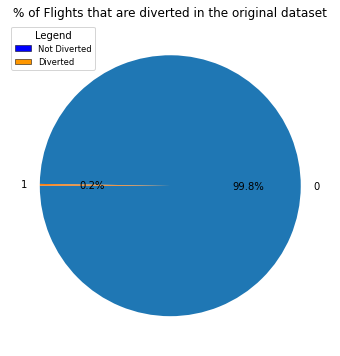

In [ ]:
plt.figure(figsize = (12,6))
plt.pie(air_df.Diverted.value_counts(),explode = (0.0, 0.0), 
        labels = air_df.Diverted.value_counts().index, autopct = '%1.1f%%', startangle= 180)
plt.title('% of Flights that are diverted in the original dataset')

plt.legend(handles = [one,two], title = 'Legend', loc = 2, fontsize = 'small');

In [ ]:
air_df.Diverted.value_counts()

0    538709
1      1186
Name: Diverted, dtype: int64

1156 of the 538,709 (About 0.2% of the) flights in the original dataset were diverted contributing to missing values

### Distribution of Flights across the years

Let's look at the flight trends from San Fransico International airport from 2005 to 2008

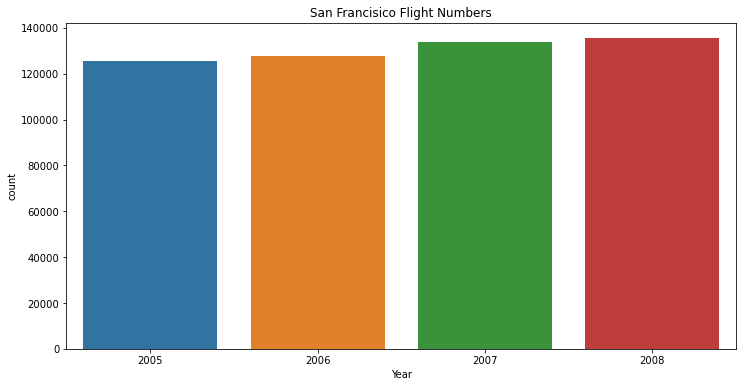

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x = air_sub_df.Year)
plt.title('San Francisico Flight Numbers');

There was a general increase in cumulative flight numbers from 2005 to 2008. Lets examine the monthly trend

In [ ]:
air_sub_df.groupby('Year')['Month'].value_counts().unstack().T

Year,2005,2006,2007,2008
Month,,,,
1,9802,10410,10670,10721
2,9092,9390,9442,10384
3,10263,10533,10888,11413
4,9988,10447,10635,11267
5,10780,10851,11240,11834
6,10863,10896,11467,11865
7,11319,11318,11921,12238
8,11356,11578,12056,12163
9,10580,10527,11341,11049


In [ ]:
month_year_df = air_sub_df.groupby('Year')['Month'].value_counts().unstack().T

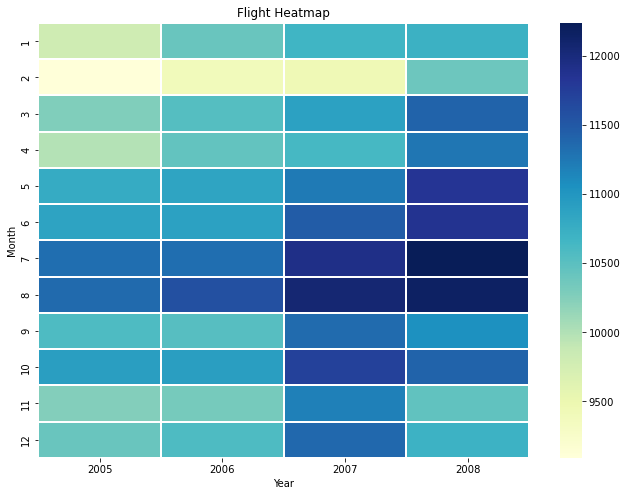

In [ ]:
plt.figure(figsize = (11, 8))
sns.heatmap(month_year_df, linewidth = 0.025, cmap = 'YlGnBu')
plt.title("Flight Heatmap")
plt.ylabel('Month')
plt.xlabel('Year');

The flights follow a seasonal pattern with business peaking around the 7th and 8th month i.e. July and August within a given year and flight numbers increasing year on year as evidenced by the darker shades in the heatmap above

In [ ]:
month_df = air_sub_df['Month'].value_counts().to_frame().reset_index().rename(columns={'index':'Month','Month':'count'})
month_df

,Month,count
0,8,47153
1,7,46796
2,6,45091
3,10,44969
4,5,44705
5,9,43497
6,3,43097
7,12,43077
8,4,42337
9,11,42237


Let's look at the cumulative trendline 

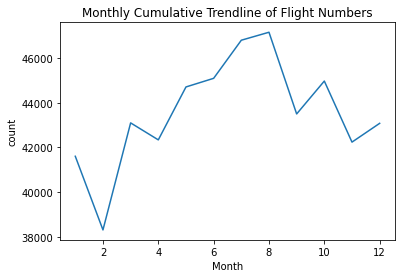

In [ ]:
sns.lineplot(data = month_df, x = 'Month', y='count')
plt.title('Monthly Cumulative Trendline of Flight Numbers');

In [ ]:
month_2005_df = air_sub_df[air_sub_df.Year == 2005]['Month'].value_counts().to_frame().reset_index().rename(columns={'index':'Month','Month':'count'})
month_2006_df = air_sub_df[air_sub_df.Year == 2006]['Month'].value_counts().to_frame().reset_index().rename(columns={'index':'Month','Month':'count'})
month_2007_df = air_sub_df[air_sub_df.Year == 2007]['Month'].value_counts().to_frame().reset_index().rename(columns={'index':'Month','Month':'count'})
month_2008_df = air_sub_df[air_sub_df.Year == 2008]['Month'].value_counts().to_frame().reset_index().rename(columns={'index':'Month','Month':'count'})

In [ ]:
months =[month_2005_df, month_2006_df,month_2007_df,month_2008_df]

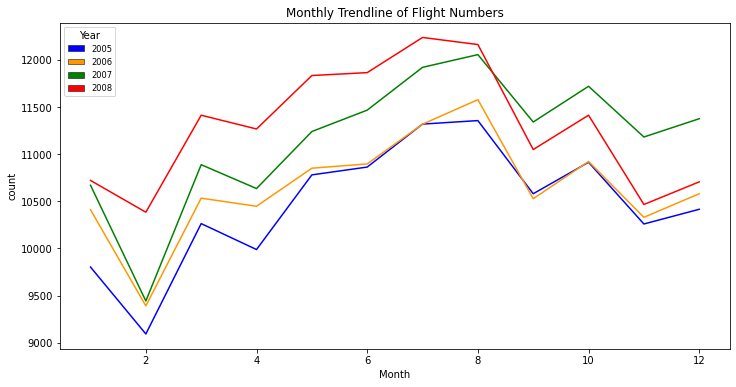

In [ ]:
plt.subplots(figsize = (12,6))
sns.lineplot(data = month_2005_df, x = 'Month', y='count', color = 'blue')
sns.lineplot(data = month_2006_df, x = 'Month', y='count', color = '#ff9700')
sns.lineplot(data = month_2007_df, x = 'Month', y='count', color = 'green')
sns.lineplot(data = month_2008_df, x = 'Month', y='count', color = 'red')
plt.title('Monthly Trendline of Flight Numbers')

one = mpatches.Patch(facecolor='Blue', label='2005', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#ff9700', label = '2006', linewidth = 0.5, edgecolor = 'black')
three = mpatches.Patch(facecolor='green', label = '2007', linewidth = 0.5, edgecolor = 'black')
four = mpatches.Patch(facecolor='red', label = '2008', linewidth = 0.5, edgecolor = 'black')

plt.legend(handles = [one,two, three,four], title = 'Year', loc = 2, fontsize = 'small', fancybox = True);

Based off the analysis, commercial air travel follows seasonal pattern with business peaking around the 7th and 8th month i.e. July and August within a given year and the flight numbers increasing year on year from 2005 to 2008

## Save and upload your notebook
Whether you're running this Jupyter notebook online or on your computer, it's essential to save your work from time to time. You can continue working on a saved notebook later or share it with friends and colleagues to let them execute your code. Jovian offers an easy way of saving and sharing your Jupyter notebooks online.



In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="commercial-air-travel-analysis")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mitchell-odili/commercial-air-travel-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mitchell-odili/commercial-air-travel-analysis


'https://jovian.ai/mitchell-odili/commercial-air-travel-analysis'

### Asking and answering questions

We've already gained several insights about the commercial air travel numbers from San Francisco International Airport by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

#### Q1. What are the popular destinations from  San Francisco International Airport (SFO)?

Flights from SFO have 73 distinct destinations

In [ ]:
air_sub_df.Dest.nunique()

73

In [ ]:
# In detail

air_sub_df.Dest.value_counts().to_frame().reset_index().rename(columns={'index':'Dest','Dest':'count'})

,Dest,count
0,LAX,42779
1,LAS,23673
2,JFK,23070
3,ORD,21677
4,SEA,21500
...,...,...
68,EGE,16
69,BIL,13
70,MSO,12
71,FCA,12


Lets explore the top 20 destinations

In [ ]:
Top_20_destinations = air_sub_df.Dest.value_counts().nlargest(20).to_frame().reset_index().rename(columns={'index':'Dest','Dest':'count'})
Top_20_destinations

,Dest,count
0,LAX,42779
1,LAS,23673
2,JFK,23070
3,ORD,21677
4,SEA,21500
5,DEN,20128
6,SAN,17642
7,PHX,16057
8,SLC,15633
9,DFW,14920


We can plot this information using a horizontal bar graph

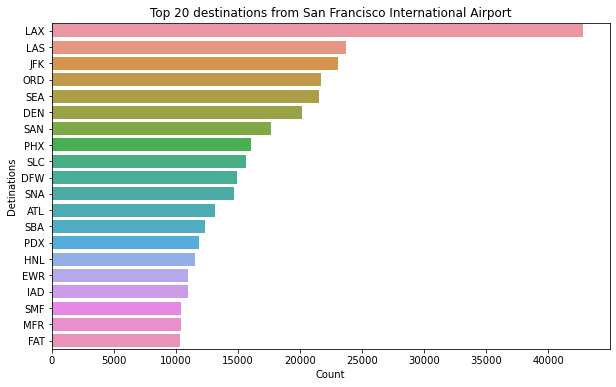

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(data = Top_20_destinations, y = 'Dest', x = 'count')
plt.title('Top 20 destinations from San Francisco International Airport')
plt.ylabel('Detinations')
plt.xlabel('Count');

Los Angeles International Airport California (LAX) is the most popular destination from San Francisco within this time period taking up 42,779 flights. Let's plot this dataset using percentages to get a relative sense of the absolute numbers

In [ ]:
Dest_pct = air_sub_df.Dest.value_counts() * 100/ air_sub_df.Dest.count()
Dest_pct
Top20_Dest_pct = Dest_pct.nlargest(20)

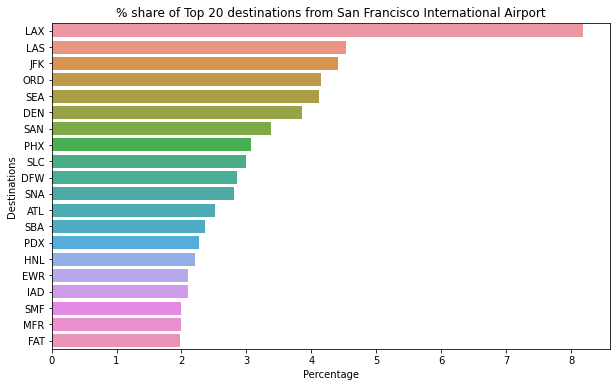

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = Top20_Dest_pct, y = Top20_Dest_pct.index)
plt.title('% share of Top 20 destinations from San Francisco International Airport')
plt.ylabel('Destinations')
plt.xlabel('Percentage');

In [ ]:
Top20_Dest_pct.sum()

63.86157170998528

LAX as the top most destination takes up 8% of the overall flights from SFO between 2005 and 2008 as per the dataset with the top 20 destinations making 63.86% of the overall flights from SFO

#### Q2. What is the nature of distance covered?

There are 73 different groupings equivalent to the destinations.Let's examine whether more flights are short/long distance?

In [ ]:
# Destinations

Dest_df = air_sub_df.Dest.value_counts().to_frame().reset_index().rename(columns={'index':'Dest','Dest':'count'})
Dest_df

,Dest,count
0,LAX,42779
1,LAS,23673
2,JFK,23070
3,ORD,21677
4,SEA,21500
...,...,...
68,EGE,16
69,BIL,13
70,MSO,12
71,FCA,12


In [ ]:
# Distance in Miles

Dist_df = air_sub_df.Distance.value_counts().to_frame().reset_index().rename(columns={'index':'Distance','Distance':'count'})
Dist_df

,Distance,count
0,337,42779
1,414,23673
2,2586,23070
3,1846,21677
4,679,21500
...,...,...
68,847,16
69,909,13
70,769,12
71,844,12


In [ ]:
#Merge the two dataframes

Dest_Dist = Dest_df.merge(Dist_df)
Dest_Dist

,Dest,count,Distance
0,LAX,42779,337
1,LAS,23673,414
2,JFK,23070,2586
3,ORD,21677,1846
4,SEA,21500,679
...,...,...,...
70,MSO,12,769
71,MSO,12,844
72,FCA,12,769
73,FCA,12,844


The distance is in miles. As can be seen the distance between SFO to LAX is 337 miles. This is supported by https://www.distance.to/SFO/LAX which measures the shortest distance (air line) between SFO and LAX is 337.52 miles (543.19 km).

Let's plot a box plot of the distances from SFO

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

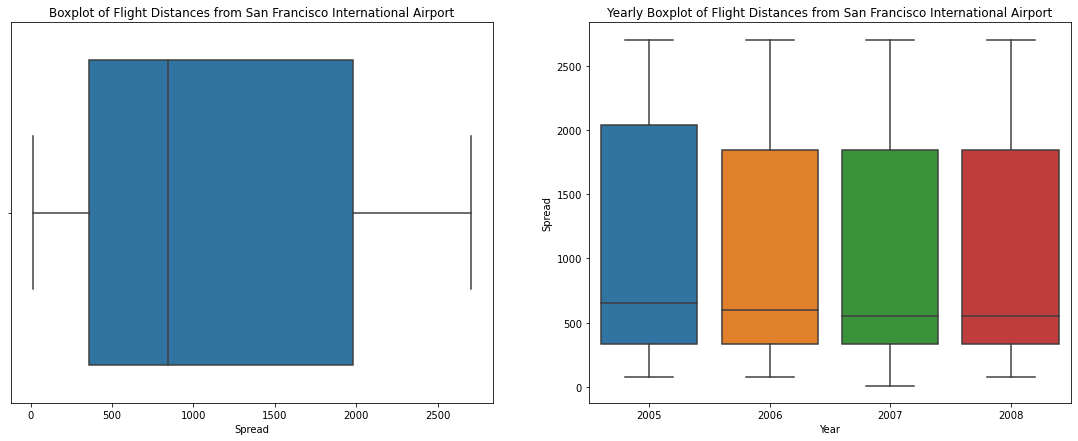

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (19,7))
g1 = sns.boxplot(x = Dest_Dist.Distance, ax = ax[0])
g1.set_title('Boxplot of Flight Distances from San Francisco International Airport')
g1.set_xlabel('Spread')

g2 = sns.boxplot(x = 'Year', y = 'Distance', data = air_sub_df , ax = ax[1])
g2.set_title('Yearly Boxplot of Flight Distances from San Francisco International Airport')
g2.set_ylabel('Spread');

Most of the flight observations range between 337 miles (25th percentile) and 2000 miles (75th percentile) with outliers that go as low as 11 miles and higher than 2500 miles. Year 2005 had a higher spread as evidenced by the height of its box plot,however 2006 through to 2008 had similar distances covered

#### Q3. What is the market share of Carriers from SFO?

We will compute the market share based on the number of flights from San Francisco International Airport where there are 21 distinct carriers

In [ ]:
air_sub_df['UniqueCarrier'].nunique()

21

`carrier_name` is as outlined

In [ ]:
carrier_name

Code
02Q                       Titan Airways
04Q                  Tradewind Aviation
05Q                 Comlux Aviation, AG
06Q       Master Top Linhas Aereas Ltd.
07Q                 Flair Airlines Ltd.
                      ...              
ZW          Air Wisconsin Airlines Corp
ZX                         Air Georgian
ZX (1)                       Airbc Ltd.
ZY               Atlantic Gulf Airlines
ZYZ                Skyway Aviation Inc.
Name: Description, Length: 1491, dtype: object

Let's look at the numbers

In [ ]:
air_sub_df['UniqueCarrier'].value_counts()

UA    171561
OO    154570
AA     48643
US     24724
DL     21249
AS     20135
CO     18175
NW     15201
WN     14843
F9      8327
MQ      6855
HP      4406
FL      3319
B6      3105
XE      2351
TZ      2293
HA      1455
EV       711
DH       463
YV       455
OH        29
Name: UniqueCarrier, dtype: int64

In [ ]:
carrier_name.UA

'United Air Lines Inc.'

United Airlines Inc takes the cake. Let's plot the graphs to see the percentage share of each carrier

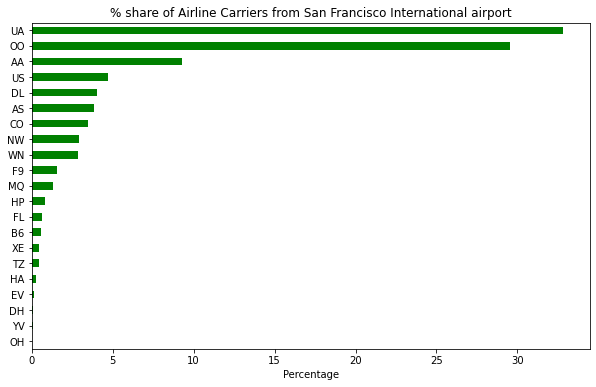

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

(air_sub_df.UniqueCarrier.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title("% share of Airline Carriers from San Francisco International airport")
plt.xlabel('Percentage');

In [ ]:
carrier_name.UA, carrier_name.OO, carrier_name.AA

('United Air Lines Inc.', 'Skywest Airlines Inc.', 'American Airlines Inc.')

In [ ]:
# Percentage Market share of United Airlines Inc

air_sub_df['UniqueCarrier'][air_sub_df['UniqueCarrier']== 'UA'].value_counts().sum() *100/ air_sub_df['UniqueCarrier'].count()

32.81140627689483

In [ ]:
# Percentage Market share of Skywest Airlines Inc

air_sub_df['UniqueCarrier'][air_sub_df['UniqueCarrier']== 'OO'].value_counts().sum() *100/ air_sub_df['UniqueCarrier'].count()

29.5618413754853

In [ ]:
# Percentage Market share of American Airlines Inc

air_sub_df['UniqueCarrier'][air_sub_df['UniqueCarrier']== 'AA'].value_counts().sum() *100/ air_sub_df['UniqueCarrier'].count()

9.30307724673437

In [ ]:
air_sub_df['UniqueCarrier'].value_counts().nlargest(3).sum() *100/ air_sub_df['UniqueCarrier'].count()

71.6763248991145

The Commercial airtravel space is dominated by 3 carriers namely 
- United Airlines Inc - 32.81% share
- Skywest Airlines Inc - 29.56% share
- American Airlines Inc - 9.30% share

making up 71.67% of all flights leaving San Francisco International Airport

#### Q4. How do the Delay times compare?

Is there a relationship between Departure delay time and Arrival Delay? Let's look at the data

In [ ]:
# Arrival Delay Time

air_sub_df.ArrDelay.value_counts().to_frame().reset_index().rename(columns={'index':'ArrDelay','ArrDelay':'count'})

,ArrDelay,count
0,-6.0,16205
1,-5.0,16056
2,-4.0,16003
3,-7.0,15922
4,-8.0,15620
...,...,...
561,374.0,1
562,821.0,1
563,851.0,1
564,393.0,1


In [ ]:
# Departure Delay Time

air_sub_df.DepDelay.value_counts().to_frame().reset_index().rename(columns={'index':'DepDelay','DepDelay':'count'})

,DepDelay,count
0,-4.0,39106
1,-3.0,39037
2,-5.0,38263
3,-2.0,35676
4,-1.0,32226
...,...,...
545,426.0,1
546,-62.0,1
547,421.0,1
548,-102.0,1


Let's plot a scatter plot to examine the possibility of a linear relationship between arrival and departure delays

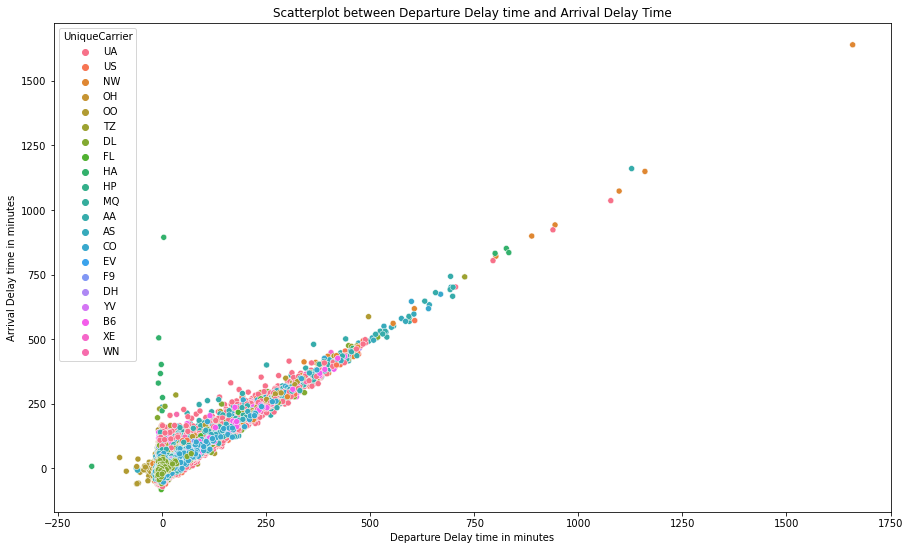

In [ ]:
plt.subplots(figsize = (15,9))
sns.scatterplot(y = 'ArrDelay', x = 'DepDelay', data = air_sub_df, hue = 'UniqueCarrier')
plt.title("Scatterplot between Departure Delay time and Arrival Delay Time")
plt.xlabel("Departure Delay time in minutes")
plt.ylabel("Arrival Delay time in minutes");

As expected there is a strong correlation between Departure delay time and arrival delay time. It almost looks linear. For the purposes of this analysis negative delay times are assumed to mean the aircraft left earlier than its scheduled time. It's ridiculous to think there are delay times to the tune of 1200 min +, that's 20 hours straight. However not unimaginable. Most observations though are less than 250 minutes in

### Save and upload your notebook
Whether you're running this Jupyter notebook online or on your computer, it's essential to save your work from time to time. You can continue working on a saved notebook later or share it with friends and colleagues to let them execute your code. Jovian offers an easy way of saving and sharing your Jupyter notebooks online.



In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="commercial-air-travel-analysis")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mitchell-odili/commercial-air-travel-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mitchell-odili/commercial-air-travel-analysis


'https://jovian.ai/mitchell-odili/commercial-air-travel-analysis'

### Inferences and Conclusions
Based off the anaysis we have done we can see things. Outlined hereafter
- Commercial air travel from San Fransisco International Airport is seasonal with business peaking around July and September (probably summer) and flight numbers growing 2005 to 2008
- There is a mix of long and short flights granting a bimodal dataset with most flights taking about 60 minutes and another set of flights taking about 300 minutes
- Flights from SFO end up in 73 different destinations with Los Angelos International Airport (LAX) as the top most destination taking up 8% of the overall flights between 2005 and 2008. The top 20 destinations make 63.86% of the overall flights from SFO
- Most of the flight observations range between 337 miles (25th percentile) and 2000 miles (75th percentile) with outliers that go as low as 11 miles and higher than 2500 miles. 
- The Commercial airtravel space is dominated by 3 carriers namely
    - United Airlines Inc - 32.81% share
    - Skywest Airlines Inc - 29.56% share
    - American Airlines Inc - 9.30% share
    
making up 71.67% of all flights leaving San Francisco International Airport
- And lastly as expected there is a strong correlation between Departure delay time and arrival delay time.

### Exercises
There's a wealth of information to be discovered using this data, and we've barely scratched the surface. Here are some ideas for further exploration:

- Conduct the analysis of destinations as served by different carriers
- Explore the delay times against the different carriers - see if some flights caught up with the lost time mid air
- Prepare analysis of the taxi volumes in and out SFO
- Prepare the analysis of the variables we dropped e.g. CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay 
- Compare the results with the previous years and identify interesting trends

### References and Future Work
Check out the following resources to learn more about the dataset and tools used in this notebook:

- UC Berkeley, Department of Statistics and D-Lab; Data presented by Chris Paciorek: https://github.com/berkeley-scf/r-bootcamp-2016/tree/master/data.
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- opendatasets Python library: https://github.com/JovianML/opendatasets

### Save and upload your notebook
Whether you're running this Jupyter notebook online or on your computer, it's essential to save your work from time to time. You can continue working on a saved notebook later or share it with friends and colleagues to let them execute your code. Jovian offers an easy way of saving and sharing your Jupyter notebooks online.



In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="commercial-air-travel-analysis")

<IPython.core.display.Javascript object>